IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Baris Kaftancioglu

Chadi Tawbi

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [3]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import random
# Importation de la librairie pickle
import pickle as pkl
import matplotlib.pyplot as plt
import time

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes

data5D=pkl.load(open('data-projet/data-5D.pkl', 'rb'))
X5D = np.array(data5D[['x1', 'x2','x3','x4','x5']], dtype=float) # conversion de type pour une meilleure compatibilité
Y5D = np.array(data5D['label'], dtype=float)

C:\Users\chadi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [5]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [6]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

## Ajout des fichiers utils et classifieur

In [7]:
def plot2DSet(desc,labels):    
    """ ndarray * ndarray -> affichage
        la fonction doit utiliser la couleur 'red' pour la classe -1 et 'blue' pour la +1
    """
   #TODO: A Compléter
    # On sépare les exemples de chaque classe
    data_negatifs = desc[labels == -1]
    data_positifs = desc[labels == +1]
    
    # Affichage des deux arrays obtenus
    plt.scatter(data_negatifs[:,0], data_negatifs[:,1], marker='o',color="red")
    plt.scatter(data_positifs[:,0], data_positifs[:,1], marker='x',color="blue")
    plt.show()
    #raise NotImplementedError("Please Implement this method")

def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé: plus il est important
        et plus le tracé de la frontière sera précis.        
        Cette fonction affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])
    
    
    
def crossval_strat(X,Y,n_iterations,iteration):
    
    index_neg, = np.where(Y == -1)
    index_pos, = np.where(Y == 1)
    
    
    index_pos_test=index_pos[iteration*(len(index_pos) // n_iterations): (iteration+1)*len(index_pos)//n_iterations]
    index_neg_test=index_neg[iteration*(len(index_neg) // n_iterations): (iteration+1)*len(index_neg)//n_iterations]
    
    X_Test=np.concatenate((X[index_neg_test],X[index_pos_test]))
    Y_Test=np.concatenate((Y[index_neg_test],Y[index_pos_test]))
    
    index_train=[i for i in range(len(X)) if ((i not in index_pos_test) and (i not in index_neg_test))]
    
    X_Train=X[index_train]
    Y_Train=Y[index_train]
    
    return X_Train,Y_Train,X_Test,Y_Test


def costcalcul(data,label,ensemble):
    """ensemble est une liste de vecteur"""
    cost=[]
    for i in range(len(ensemble)):
        w=ensemble[i].copy()
        y_i=np.dot(data,w)
        C=np.multiply(label,y_i)
        C=np.ones(len(data))-C
        C[C <= 0] = 0
        cost.append(np.sum(C))
    
    return cost

In [8]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
        

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        acc=0
        for i in range(0,len(desc_set)):
            pred=self.predict(desc_set[i])
            #print(pred == label_set[i])
            if(pred == label_set[i]):
                acc=acc+1
        
        return acc/len(desc_set)


class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    # ATTENTION : il faut compléter cette classe avant de l'utiliser !
    
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.input_dimension=input_dimension
        self.k=k
        self.desc=[]
        self.label=[]
        #raise NotImplementedError("Please Implement this method")
        

    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        
        return -1 if self.score(x)/2 + 0.5 <= 0.5 else +1

    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        dist = np.linalg.norm(self.desc-x, axis=1)
        argsort = np.argsort(dist)
        score = np.sum(self.label[argsort[:self.k]] == 1)
        return 2 * (score/self.k -0.5)
        raise NotImplementedError("Please Implement this method")

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        self.desc = desc_set
        self.label = label_set
        #raise NotImplementedError("Please Implement this method")


class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate, init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate : epsilon
                - init est le mode d'initialisation de w: 
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        if init==0:
            self.w = np.zeros(self.input_dimension)
        else:
            v = np.random.uniform(0, 1, input_dimension)
            v = (2*v - 1)*0.001
            self.w = v.copy()
        
        self.allw=[self.w.copy()]
        #raise NotImplementedError("Please Implement this method")
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        for i in np.random.permutation(desc_set.shape[0]):
            if self.predict(desc_set[i]) != label_set[i]:
                self.w += self.learning_rate * label_set[i] * desc_set[i]
                self.allw.append(self.w.copy())
     
    def train(self, desc_set, label_set, niter_max=100, seuil=0.01):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.01) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """ 
        converge = False
        cpt = 0
        liste_difference=[]
        while(not converge and cpt < niter_max):
            ancien_w = self.w.copy()
            self.train_step(desc_set, label_set)
            diff = abs(ancien_w - self.w)
            norm = np.linalg.norm(diff)
            liste_difference.append(norm)
            converge = norm <= seuil
            cpt+=1
            
        return liste_difference
        #raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(self.w, x)
        #raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        score_x = self.score(x)
        if (score_x>=0):
            return 1
        else:
            return -1
        #raise NotImplementedError("Please Implement this method")

    def get_allw(self):
        return self.allw
    

class ClassifierPerceptronBiais(ClassifierPerceptron):
    """ Perceptron de Rosenblatt avec biais
        Variante du perceptron de base
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        # Appel du constructeur de la classe mère
        super().__init__(input_dimension, learning_rate, init)
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        self.allw = []
        if (init == 0): 
            self.w = np.zeros(input_dimension)
        elif (init == 1): 
            self.w = 0.001 * (2 * np.random.uniform(0, 1, input_dimension) - 1)
        self.allw.append(self.w.copy())
        
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        ### A COMPLETER !
        # Ne pas oublier d'ajouter les poids à allw avant de terminer la méthode
        index_list =[i for i in range(len(desc_set))]
        np.random.shuffle(index_list)
        for i in (index_list):
            Xi, Yi = desc_set[i,:], label_set[i]
            y_hat = np.dot(self.w, Xi)
            if (y_hat*Yi<1):    # Il y a erreur, donc correction
                self.w += self.learning_rate*np.dot(Xi,Yi)
                self.allw.append(self.w.copy())
        #raise NotImplementedError("Vous devez implémenter cette méthode !")

# 1. Les Données en 2D

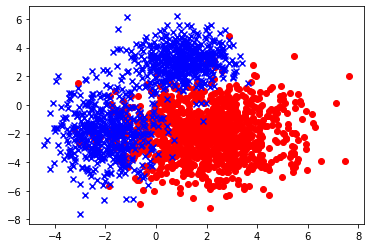

In [9]:
# Affichage
plot2DSet(X2D,Y2D)

# 1.1 KNN

## 1.1.1 Le calcul de k optimal

In [10]:
def found_k(desc_set,label_set,dimension,retour=True,graphe=True):
    """
    Fonction qui permet de déterminer le nombre optimal de voisins K pour un classificateur KNN.
    :param desc_set: un numpy array représentant les données d'entrée
    :param label_set: un numpy array représentant les étiquettes de classe correspondantes pour chaque donnée
    :param dimension: la dimension de l'espace d'entrée
    """
    KNN_test_acc=[]
    List_k=[]
    for k in range(1,500*dimension,2):
        # appel à la fonction crossval_strat() pour obtenir les données de train et de test
        desc_train,label_train,desc_test,label_test=crossval_strat(desc_set,label_set,10,2)
        # initialisation d'un classifieur KNN
        classifeurKNN=ClassifierKNN(dimension,k)
        List_k.append(k)
        # entrainement du modèle sur les données de train
        classifeurKNN.train(desc_train,label_train)
        accKNN=classifeurKNN.accuracy(desc_test,label_test)
        KNN_test_acc.append(accKNN)
    # l'indice du maximum de la liste d'accuracy
    index=np.argmax(KNN_test_acc)
    
    if graphe:
        plt.plot(List_k,KNN_test_acc)
        plt.title("Le variation de taux accuracy en fonction de k")
        plt.ylabel("Le taux de Accuracy")
        plt.xlabel("Le valeur de K")
        plt.show()
        
        

    if retour:
        return 2*index-1
    

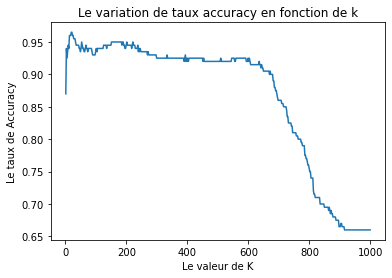

17

In [11]:
k_optimal=found_k(X2D,Y2D,2)
k_optimal

D'après le test,on voit que le meilleur k pour ce Data Frame est 17.On teste seulement avec des valeurs impairs car les valeurs pairs créent une effet de mirrior.On en déduit que le taux accuracy arrive à son valeur optimal et commence à diminuer en fonction de k.

## 1.1.2 Le plot de KNN Classifieur avec le k_optimal

Accuracy :  0.93


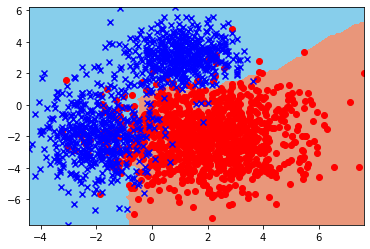

In [12]:
knn_2D =ClassifierKNN(2,k_optimal)

# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train, label_train, desc_test, label_test = crossval_strat(X2D,Y2D,10,2)
knn_2D.train(desc_train, label_train)

print("Accuracy : ", knn_2D.accuracy(X2D,Y2D))

# Affichage de la frontière de séparation des classes
plot_frontiere(X2D,Y2D,knn_2D,step=100)
plot2DSet(X2D,Y2D)

Le plot nous montre que le classifieur marche bien.

## 1.1.3 Le Temps de calcul 

In [13]:
temps_calcul=0
# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train,label_train,desc_test,label_test=crossval_strat(X2D,Y2D,10,2)

# calcule 10 fois le temps pris par l'apprentissage knn
for i in range(10):
    debut=time.time()
    classifeurKNNtime=ClassifierKNN(2,k_optimal)
    classifeurKNNtime.train(desc_train,label_train)
    accKNN=classifeurKNNtime.accuracy(desc_test,label_test)
    fin=time.time()
    temps_calcul=temps_calcul+fin-debut

#retourne la moyenne des temps
str_temps_calcul_KNN=str(temps_calcul/10)
print("Le temps de calcul est ",str_temps_calcul_KNN," en s")
    

Le temps de calcul est  0.05491917133331299  en s


# 1.2 Perceptron

## 1.2.1 Calcul d'Epsilon optimal

In [45]:
eps=0.1
acc_eps=[]
list_eps=[]
random.seed(42)

# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train,label_train,desc_test,label_test=crossval_strat(X2D,Y2D,10,2)

# faire 10 fois l'apprentissage Perceptron en inserant dans une liste chaque precision de chaque epsilon utilise
for i in range(10):
    pcp_2D=ClassifierPerceptron(2,eps,init=0)
    pcp_2D.train(desc_train, label_train)
    acc_eps.append(pcp_2D.accuracy(desc_test,label_test))
    list_eps.append(eps)
    eps=eps*0.1

#retourne l'index du plus grand accuracy
index=np.argmax(acc_eps)

#cherche l'epsilon qui a donner cette accuracy
eps_optimal=list_eps[index]
eps_optimal

0.1

D'après le test qu'on a fait sur le perceptron, on constate que le valeur de Epsilon joue un role importante dans le taux de l'accuracy. On a appliqué le test au dessous afin de trouver l'epsilon optimal en utilisant même dataframe et même vecteur initial.

## 1.2.2 Calcul de init optimal

In [15]:
initials=[0,1]
accuracy_init=[]
# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train,label_train,desc_test,label_test=crossval_strat(X2D,Y2D,10,2)

for k in initials:
    
    # initialisation d'un classifieur Perceptron
    pcp_2D=ClassifierPerceptron(2,eps_optimal,init=k)
    
    # entrainement du modèle sur les données de train
    pcp_2D.train(desc_train, label_train)
    
    # ajout de l'accuracy obtenue sur les données de test dans la liste accuracy_init
    accuracy_init.append(pcp_2D.accuracy(desc_test,label_test))
    
# retourne l'index du maximum de la liste des precisions
init_optimal=np.argmax(accuracy_init)

init_optimal

1

D'après le test qu'on a fait sur le perceptron, on constate que le valeur de vecteur initial joue un role importante dans le taux de l'accuracy. On a appliqué le test au dessus afin de trouver le vecteur initial optimal en utilisant même dataframe et même epsilon(ce qui est optimal).

## 1.2.3 Calcul de taux accuracy

Accuracy :  0.56


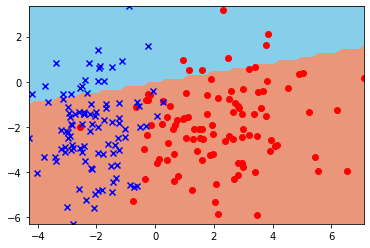

In [16]:
dim = 2
#appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train, label_train, desc_test, label_test =crossval_strat(X2D,Y2D,10,2)

#initialisation d'un classifieur Perceptron
pcp_2D= ClassifierPerceptron(dim,eps_optimal,init=init_optimal)

#entrainement du modèle sur les données de train
pcp_2D.train(desc_train, label_train)

print("Accuracy : ", pcp_2D.accuracy(desc_test,label_test))

# Affichage de la frontière de séparation des classes
plot_frontiere(desc_test,label_test,pcp_2D,step=60)
plot2DSet(desc_test,label_test)

## 1.2.4 La courbe de changement de W

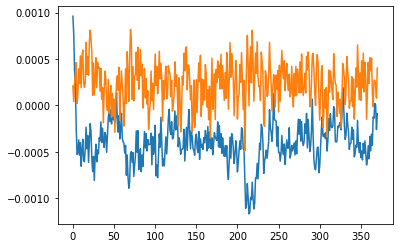

In [17]:
# récupération de tous les poids
list_allw=pcp_2D.get_allw()

# affichage de la courbe des poids
plt.plot(list_allw)
plt.show()

Cette graphe nous montre la variation des éléments de w. Quand le premier paramètre augmente, le deuxième diminue et inversement.

## 1.2.5 Cout de calcul

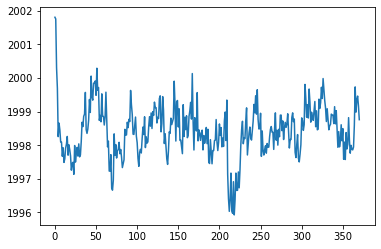

In [18]:
# recupere les couts de calcul dans une liste
list_cout=costcalcul(X2D,Y2D,list_allw)

# affichage de la courbe
plt.plot(list_cout)
plt.show()

Le graphe de cout de calcul nous montre la convergence de vecteur w de perceptron.

# 1.3 Perceptron Bias

## 1.3.1 Calcul d'Epsilon optimal

In [54]:
eps=0.1
acc_eps=[]
list_eps=[]
# Appel de la fonction crossval_strat() pour obtenir les données de train et de test
desc_train,label_train,desc_test,label_test=crossval_strat(X2D,Y2D,10,2)

for i in range(10):
    
   # création d'un objet de la classe ClassifierPerceptronBiais
    pcpbiais_2D= ClassifierPerceptronBiais(2,eps,init=0)
    
    # entrainement du modèle sur les données de train
    pcpbiais_2D.train(desc_train, label_train)
    
    # stockage de la précision obtenue sur desc_test et label_test dans la liste acc_eps
    acc_eps.append(pcpbiais_2D.accuracy(desc_test,label_test))
    
    # stockage de la valeur de eps actuelle dans la liste list_eps
    list_eps.append(eps)
    
    # mise à jour de la valeur de eps en multipliant par 0.1
    eps=eps*0.1
    
# recherche de l'indice de la valeur maximale de précision dans la liste acc_eps
index=np.argmax(acc_eps)

# récupération de la valeur de eps associée à la valeur maximale de précision dans la liste list_eps
eps_optimal_bias=list_eps[index]

eps_optimal_bias

0.1

## 1.3.2 Calcul de init optimal

In [55]:
initials=[0,1]
accuracy_init=[]
# Appel de la fonction crossval_strat() pour obtenir les données de train et de test
desc_train,label_train,desc_test,label_test=crossval_strat(X2D,Y2D,10,2)

for k in initials:
    
    # initialisation d'un classifieur Perceptron Biais
    pcpbiais_2D= ClassifierPerceptronBiais(2,eps_optimal,init=k)
    # entrainement du modèle sur les données de train
    pcpbiais_2D.train(desc_train, label_train)
    accuracy_init.append(pcp_2D.accuracy(desc_test,label_test))

init_optimal_bias=np.argmax(accuracy_init)

init_optimal_bias

0

## 1.3.3 Calcul de taux accuracy

Accuracy :  0.56


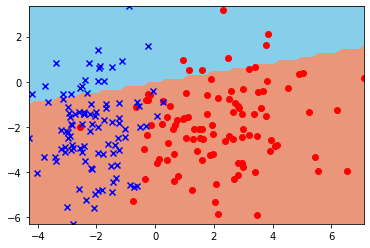

In [21]:
dim = 2
# Appel de la fonction crossval_strat() pour obtenir les données de train et de test
desc_train, label_train, desc_test, label_test = crossval_strat(X2D,Y2D,10,2)

# initialisation d'un classifieur Perceptron Biais
pcpbiais_2D=ClassifierPerceptronBiais(dim,eps_optimal_bias,init=init_optimal_bias)

# entrainement du modèle sur les données de train
pcpbiais_2D.train(desc_train, label_train)

print("Accuracy : ", pcp_2D.accuracy(desc_test,label_test))

# Affichage de la frontière de séparation des classes
plot_frontiere(desc_test,label_test,pcp_2D,step=60)
plot2DSet(desc_test,label_test)

## 1.3.4 La courbe de changement de W

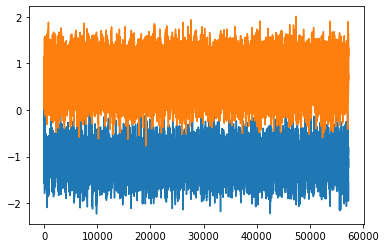

In [22]:
#récupération de tous les poids
list_allw_biais=pcpbiais_2D.get_allw()

# affichage de la courbe des poids
plt.plot(list_allw_biais)
plt.show()

## 1.3.5 Cout de calcul

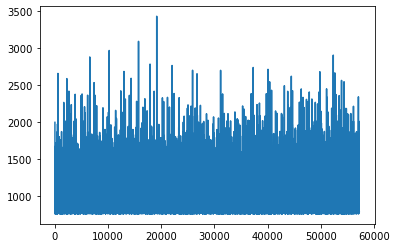

In [23]:
# recupere les couts de calcul dans une liste
list_cout=costcalcul(X2D,Y2D,list_allw_biais)

# affichage
plt.plot(list_cout)
plt.show()

# Test performance 2D

In [52]:
nb_frac=10

# Fixer la graine aléatoire à 42 pour la reproductibilité des résultats
random.seed(42)

# Initialiser des listes vides pour stocker les résultats d'accuracy
KNN_acc=[]
Per_acc=[]
Per_bias_acc=[]

# Boucle pour itérer sur le nombre de fractions défini précédemment
for i in range(nb_frac):

    # Initialiser des classifieurs KNN, Perceptron et PerceptronBiais
    classifeurKNN1=ClassifierKNN(2,k_optimal)
    classifieurper1=ClassifierPerceptron(2,eps_optimal,init_optimal)
    classifieurperbias1=ClassifierPerceptronBiais(2,eps_optimal_bias,init_optimal_bias)
    
    # Séparer les données en ensembles d'entraînement et de test avec la méthode cross-validation stratifiée
    desc_train,label_train,desc_test,label_test=crossval_strat(X2D,Y2D,nb_frac,i)
    
    # Entraîner le classifieur KNN sur les données d'entraînement
    classifeurKNN1.train(desc_train,label_train)
    
    # Calculer l'accuracy du classifieur KNN sur les données de test et l'ajouter à la liste KNN_acc
    accKNN=classifeurKNN1.accuracy(desc_test,label_test)
    KNN_acc.append(accKNN)
    
    # Entraîner le classifieur Perceptron sur les données d'entraînement
    classifieurper1.train(desc_train,label_train)
    
    # Calculer l'accuracy du classifieur Perceptron sur les données de test et l'ajouter à la liste Per_acc
    accPer=classifieurper1.accuracy(desc_test,label_test)
    Per_acc.append(accPer)
    
    # Entraîner le classifieur PerceptronBiais sur les données d'entraînement
    classifieurperbias1.train(desc_train,label_train)
    
    # Calculer l'accuracy du classifieur PerceptronBiais sur les données de test et l'ajouter à la liste Per_bias_acc
    accPerbias=classifieurperbias1.accuracy(desc_test,label_test)
    Per_bias_acc.append(accPerbias)

In [53]:
print("Le taux accuracy avec le label test de KNN est ",np.mean(KNN_acc))
print("Le taux accuracy de Perceptron avec le label test est ",np.mean(Per_acc))
print("Le taux accuracy de Perceptron bias avec le label test est ",np.mean(Per_bias_acc))

Le taux accuracy avec le label test de KNN est  0.9264999999999999
Le taux accuracy de Perceptron avec le label test est  0.7205
Le taux accuracy de Perceptron bias avec le label test est  0.7585


On peut voir que l'algorithme KNN a un taux d'accuracy plus fort que Perceptron et Perceptron Bias. 

# 2. Les Données en 5D

# 2.1 KNN

## 2.1.1 Le calcul de k optimal

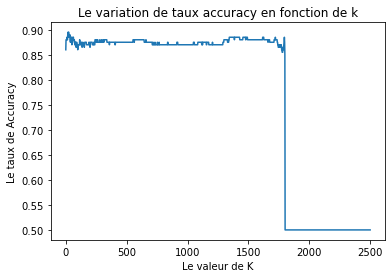

17

In [26]:
# utilisation de la fonction found_k pour trouver le k optimale
k_optimal_5D=found_k(X5D,Y5D,5)
k_optimal_5D

## 2.1.2 Taux accuracy de KNN

In [27]:
knn_5D = ClassifierKNN(5,k_optimal_5D)

# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train, label_train, desc_test, label_test =crossval_strat(X5D,Y5D,10,2)
knn_5D.train(desc_train, label_train)

print("Accuracy : ", knn_5D.accuracy(X5D,Y5D))


Accuracy :  0.8965


## 2.1.3 Le temps de calcul

In [28]:
temps_calcul=0
# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train,label_train,desc_test,label_test=crossval_strat(X5D,Y5D,10,2)

# calcule 10 fois le temps pris par l'apprentissage knn 5d
for i in range(10):
    debut=time.time()
    classifeurKNNtime=ClassifierKNN(5,k_optimal_5D)
    # entrainement du modèle sur les données de train
    classifeurKNNtime.train(desc_train,label_train)
    accKNN=classifeurKNNtime.accuracy(desc_test,label_test)
    fin=time.time()
    temps_calcul=temps_calcul+fin-debut

str_temps_calcul_KNN=str(temps_calcul/10)
print("Le temps de calcul est ",str_temps_calcul_KNN," en s")

Le temps de calcul est  0.05543177127838135  en s


# 2.2 Perceptron

## 2.2.1 Calcul d'Epsilon optimal

In [29]:
eps=0.1
acc_eps=[]
list_eps=[]
random.seed(42)

# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train,label_train,desc_test,label_test=crossval_strat(X5D,Y5D,10,2)

for i in range(10):
    # Creation du Classifier Perceptron 5d
    pcp_5D=ClassifierPerceptron(5,eps,init=0)
    # entrainement du modèle sur les données de train
    pcp_5D.train(desc_train, label_train)
    acc_eps.append(pcp_5D.accuracy(desc_test,label_test))
    list_eps.append(eps)
    eps=eps*0.1

index=np.argmax(acc_eps)
eps_optimal_5D=list_eps[index]
eps_optimal_5D

0.010000000000000002

## 2.2.2 Calcul de init optimal

In [30]:
initials=[0,1]
accuracy_init=[]

# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train,label_train,desc_test,label_test=crossval_strat(X5D,Y5D,10,2)

for k in initials:
    
    # Creation du Classifier Perceptron 5d
    pcp_5D=ClassifierPerceptron(5,eps_optimal_5D,init=k)
    
    # entrainement du modèle sur les données de train
    pcp_5D.train(desc_train, label_train)
    
    accuracy_init.append(pcp_5D.accuracy(desc_test,label_test))

init_optimal_5D=np.argmax(accuracy_init)

#affichage d'init optimial
init_optimal_5D

0

## 2.2.3 Taux accuracy de Perceptron

In [31]:
dim = 5
# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train, label_train, desc_test, label_test =crossval_strat(X5D,Y5D,10,2)

# Creation du Classifier Perceptron 5d
pcp_5D=ClassifierPerceptron(dim,eps_optimal_5D,init=init_optimal_5D)

# entrainement du modèle sur les données de train
pcp_5D.train(desc_train, label_train)

#affichage de la precision
print("Accuracy : ", pcp_5D.accuracy(desc_test,label_test))

Accuracy :  0.86


## 2.2.4 La courbe de changement de W

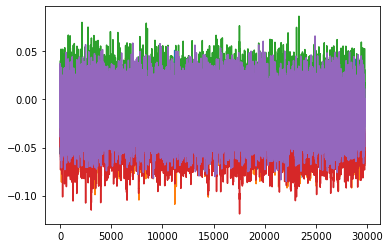

In [32]:
# recuperation des poids
list_allw_5D=pcp_5D.get_allw()

# affichage
plt.plot(list_allw_5D)
plt.show()

## 2.2.5 Cout de calcul

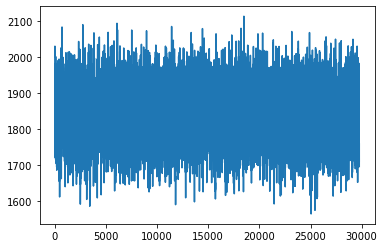

In [33]:
# recuperation des couts
list_cout_5D=costcalcul(X5D,Y5D,list_allw_5D)

# affichage
plt.plot(list_cout_5D)
plt.show()

# 2.3 Perceptron Biais

## 2.3.1 Calcul d'Epsilon optimal

In [34]:
eps=0.1
acc_eps=[]
list_eps=[]
random.seed(42)
# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train,label_train,desc_test,label_test=crossval_strat(X5D,Y5D,10,2)

for i in range(10):
    
    # Creation du Classifier Perceptron Biais 5d
    pcpbiais_5D=ClassifierPerceptronBiais(5,eps,init=0)
    
    # entrainement du modèle sur les données de train
    pcpbiais_5D.train(desc_train, label_train)
    
    acc_eps.append(pcpbiais_5D.accuracy(desc_test,label_test))
    list_eps.append(eps)
    eps=eps*0.1

index=np.argmax(acc_eps)
eps_biais_optimal_5D=list_eps[index]
eps_biais_optimal_5D

0.00010000000000000003

## 2.3.2 Calcul de init optimal

In [35]:
initials=[0,1]
accuracy_init=[]
# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train,label_train,desc_test,label_test=crossval_strat(X5D,Y5D,10,2)

for k in initials:
    
    # Creation du Classifier Perceptron Biais 5d
    pcpbiais_5D= ClassifierPerceptronBiais(5,eps_biais_optimal_5D,init=k)
    
    # entrainement du modèle sur les données de train
    pcpbiais_5D.train(desc_train, label_train)
    
    accuracy_init.append(pcpbiais_5D.accuracy(desc_test,label_test))

init_biais_optimal_5D=np.argmax(accuracy_init)

init_biais_optimal_5D

0

## 2.3.3 Taux accuracy de Perceptron Bias

In [56]:
dim = 5
# appel à la fonction crossval_strat() pour obtenir les données de train et de test
desc_train, label_train, desc_test, label_test =crossval_strat(X5D,Y5D,10,2)

# Creation du Classifier Perceptron Biais 5d
pcpbiais_5D= ClassifierPerceptronBiais(dim,eps_biais_optimal_5D,init=init_biais_optimal_5D)

# entrainement du modèle sur les données de train
pcpbiais_5D.train(desc_train, label_train)

# Affichage de la precision
print("Accuracy : ", pcpbiais_5D.accuracy(desc_test,label_test))

Accuracy :  0.895


## 2.3.4 La courbe de changement de W

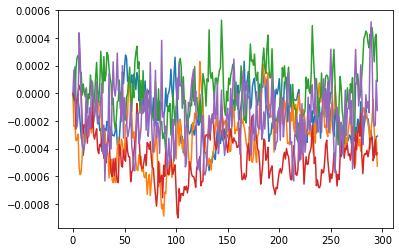

In [37]:
# recuperation des poids
list_allw_biais_5D=pcpbiais_5D.get_allw()

# affichage
plt.plot(list_allw_biais_5D)
plt.show()

## 2.3.5 Cout de calcul

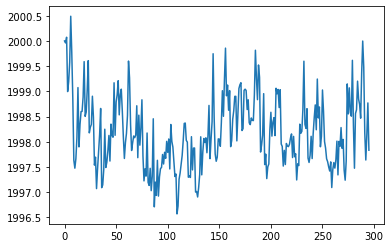

In [38]:
# recuperation des couts
list_cout_5D_biais=costcalcul(X5D,Y5D,list_allw_biais_5D)

# affichage
plt.plot(list_cout_5D_biais)
plt.show()

# Test performance 5D

In [48]:
nb_frac=10

# Fixer la graine aléatoire à 42 pour la reproductibilité des résultats
random.seed(42)

# Initialiser des listes vides pour stocker les résultats d'accuracy
KNN_acc=[]
Per_acc=[]
Per_bias_acc=[]

# Boucle pour itérer sur le nombre de fractions défini précédemment
for i in range(nb_frac):

    # Initialiser des classifieurs KNN, Perceptron et PerceptronBiais
    classifeurKNN1=ClassifierKNN(5,k_optimal)
    classifieurper1=ClassifierPerceptron(5,eps_optimal,init_optimal)
    classifieurperbias1=ClassifierPerceptronBiais(5,eps_optimal_bias,init_optimal_bias)
    
    # Séparer les données en ensembles d'entraînement et de test avec la méthode cross-validation stratifiée
    desc_train,label_train,desc_test,label_test=crossval_strat(X5D,Y5D,nb_frac,i)
    
    # Entraîner le classifieur KNN sur les données d'entraînement
    classifeurKNN1.train(desc_train,label_train)
    
    # Calculer l'accuracy du classifieur KNN sur les données de test et l'ajouter à la liste KNN_acc
    accKNN=classifeurKNN1.accuracy(desc_test,label_test)
    KNN_acc.append(accKNN)
    
    # Entraîner le classifieur Perceptron sur les données d'entraînement
    classifieurper1.train(desc_train,label_train)
    
    # Calculer l'accuracy du classifieur Perceptron sur les données de test et l'ajouter à la liste Per_acc
    accPer=classifieurper1.accuracy(desc_test,label_test)
    Per_acc.append(accPer)
    
    # Entraîner le classifieur PerceptronBiais sur les données d'entraînement
    classifieurperbias1.train(desc_train,label_train)
    
    # Calculer l'accuracy du classifieur PerceptronBiais sur les données de test et l'ajouter à la liste Per_bias_acc
    accPerbias=classifieurperbias1.accuracy(desc_test,label_test)
    Per_bias_acc.append(accPerbias)

In [50]:
print("Le taux accuracy avec le label test de KNN 5D est ",np.mean(KNN_acc))
print("Le taux accuracy de Perceptron 5D avec le label test est ",np.mean(Per_acc))
print("Le taux accuracy de Perceptron bias 5D avec le label test est ",np.mean(Per_bias_acc))

Le taux accuracy avec le label test de KNN 5D est  0.8895
Le taux accuracy de Perceptron 5D avec le label test est  0.857
Le taux accuracy de Perceptron bias 5D avec le label test est  0.8705


Sur 5 dimensions, on voit que le taux accuracy est à peu près le même pour les 3 algorithmes.